In [10]:
# basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
from sklearn.datasets import fetch_lfw_pairs
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Load the LFW dataset
lfw_pairs = fetch_lfw_pairs(subset='all', resize=0.5)

# Extract the data and labels
X = lfw_pairs.data
y = lfw_pairs.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Preprocess the data (scaling and dimensionality reduction)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Apply PCA for dimensionality reduction (you can adjust the number of components as needed)
pca = PCA(n_components=100)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

# Create an SVM classifier
clf = SVC(C=1.0, kernel='linear')

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")


InvalidParameterError: The 'subset' parameter of fetch_lfw_pairs must be a str among {'test', 'train', '10_folds'}. Got 'all' instead.

# Load dataset from sklearn

In [23]:
from sklearn.datasets import fetch_lfw_pairs

lfw_pairs = fetch_lfw_pairs(resize=0.5)
print(lfw_pairs.target_names)
print()
print(lfw_pairs.pairs.shape)

['Different persons' 'Same person']

(2200, 2, 62, 47)


# Plot the data

TypeError: Invalid shape (2, 62, 47) for image data

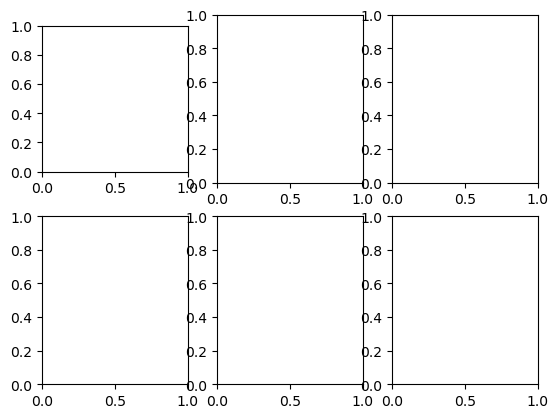

In [27]:
fig, ax = plt.subplots(2, 3)

for i, axi in enumerate(ax.flat):
    axi.imshow(lfw_pairs.pairs[i])
    axi.set(xticks=[], yticks=[], xlabel=lfw_pairs.target_names[lfw_pairs.target[i]])

plt.show()


# Assign X & Y

In [28]:
X = lfw_pairs.data
y = lfw_pairs.target

# Split the data into Training & Testing

In [30]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3, random_state=42)


print('*'*30 + 'Training data' + '*'*30)
print('Training data-X- shape: \t',xtrain.shape)
print()
print('Training data-Y- shape: \t',ytrain.shape)
print()
print('*'*30 + 'Testing data' + '*'*30)
print()
print('Training data-(X-Input)-shape: \t',xtest.shape)
print()
print('Training data-(Y-outcome)-shape: \t',ytest.shape)

******************************Training data******************************
Training data-X- shape: 	 (1540, 5828)

Training data-Y- shape: 	 (1540,)

******************************Testing data******************************

Training data-(X-Input)-shape: 	 (660, 5828)

Training data-(Y-outcome)-shape: 	 (660,)


In [31]:
# Model parameter configuration  
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

pca = PCA(n_components=150,whiten=True, random_state=42)
svc = SVC(kernel='rbf', class_weight='balanced')
pipe_model = make_pipeline(pca,svc)


#Train Model

from sklearn.model_selection import GridSearchCV # to get option parameter value

param_grid = {'svc__C':[1,5,10,20,50],
              'svc__gamma':[0.0001,0.0005,0.001,0.005]
             }
grid = GridSearchCV(pipe_model,param_grid)

%time grid.fit(xtrain,ytrain)

print(grid.best_params_)

CPU times: total: 7min
Wall time: 2min 56s
{'svc__C': 10, 'svc__gamma': 0.005}


In [32]:
model = grid.best_estimator_
print(model)

Pipeline(steps=[('pca', PCA(n_components=150, random_state=42, whiten=True)),
                ('svc', SVC(C=10, class_weight='balanced', gamma=0.005))])


In [33]:
#Testing the model
yfit = model.predict(xtest)
yfit

array([1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,

# Plot the outcome

ValueError: cannot reshape array of size 5828 into shape (62,47)

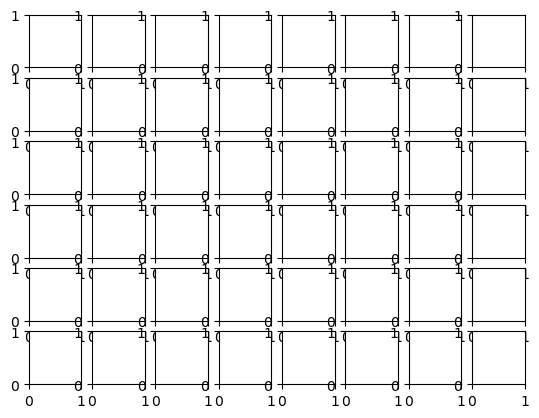

In [34]:
fig,ax=plt.subplots(6,8)
for i,axi in enumerate(ax.flat):
    axi.imshow(xtest[i].reshape(62,47),cmap = 'bone')
    axi.set(xticks=[],yticks=[])
    axi.set_ylabel(lfw_pairs.target_names[yfit[i]].split()[-1],color='green'
                  if yfit[i]==ytest[i] else 'red')
    
fig.suptitle('Predicted Names; Incorrect Labels in Red',size =  14)

# Compute the performance

In [36]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
print('*'*75)
print('Accuracy Score:\t\n',accuracy_score(ytest,yfit))
print('*'*75)
print('Confusion Matrix:\t\n',confusion_matrix(ytest,yfit))
print('*'*75)
print('Classification Report:\t\n',classification_report(ytest,yfit,target_names=lfw_pairs.target_names))
print('*'*75)

***************************************************************************
Accuracy Score:	
 0.6318181818181818
***************************************************************************
Confusion Matrix:	
 [[209 114]
 [129 208]]
***************************************************************************
Classification Report:	
                    precision    recall  f1-score   support

Different persons       0.62      0.65      0.63       323
      Same person       0.65      0.62      0.63       337

         accuracy                           0.63       660
        macro avg       0.63      0.63      0.63       660
     weighted avg       0.63      0.63      0.63       660

***************************************************************************


Text(50.72222222222221, 0.5, 'Predicted Label')

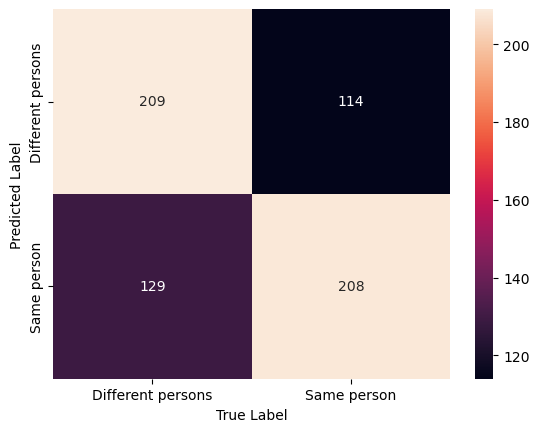

In [37]:
cm = confusion_matrix(ytest,yfit)
sns.heatmap(cm,annot=True,fmt='d',xticklabels=lfw_pairs.target_names,yticklabels=lfw_pairs.target_names)
plt.xlabel('True Label')
plt.ylabel('Predicted Label')